# PROJET STREET FIGHTER AI

Made by those (cool) guys:
- RACHATI Imad
- AIT MOHEMO Hamza
- AIT SAHEL Lorlay
- MAIZA Farès

# Part 1 : Setup Street fighter

INITIALISATION DES LIBRAIRIE DE L'ENVIRONNEMENT (extremement important)

In [1]:
pip install importlib-metadata==4.13.0

  Using cached importlib_metadata-4.13.0-py3-none-any.whl (23 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyglet==1.5.27

  Using cached pyglet-1.5.27-py3-none-any.whl (1.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gym==0.21.0 gym-retro

  Using cached gym-0.21.0-py3-none-any.whl
  Using cached gym_retro-0.8.0-cp37-cp37m-win_amd64.whl (152.0 MB)
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
  Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl (14.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# On import l'environnement de Gym retro pour pouvoir jouer a street fighter dessus (avec une ROM)
import retro
import time

ModuleNotFoundError: No module named 'retro'

In [2]:
#python -m retro.import .

In [19]:
# Créer une instance de notre environnement Street fighters
env = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')

In [4]:
# on ne peux lancer qu'un environnement a la fois, avant de le relancer fermez l'ancien avec :
#env.close()

### Qu'est ce que le "env"

In [20]:
#On constate avec observation spaces que le env contient une matrice de dimension 200x256x3
#En gros c'est une image de dimension 200x256 et le 3 c'est l'info rgb
env.observation_space

Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
 

In [21]:
# la fonction action_space retourne un "Multibinary 12"
# pour faire simple c'est une liste de 12 bits qui permettent des actions
# par exemple : 
# [1,1,1,0,1,1,1,1,0,1,1,1] est une action précise (ptet coup de poing)
# [1,0,1,1,0,0,0,1,0,1,1,0] est aussi une autre action precise (ptet coup de pied)
# En gros c'est comme la manette du jeu
# ça liste tout les moves possibles

env.action_space

MultiBinary(12)

In [22]:
#exemple de move possible
env.action_space.sample()

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int8)

### Ecriture de la boucle de jeu

In [23]:
# On remet le jeu a son etat initial (on reset en gros)
obs = env.reset()
# c'est le flag qui retourne True si le jeu est fini (si on a perdu ou gagné)
done = False
for game in range(1):
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        #                              grâce a ça on va faire un move
        # et ça va nous retourner le                ||
        # résultat de ce move                       v
        obs, reward, done, info = env.step(env.action_space.sample())
        
        # Je l'ai mis en commentaire mais vous pouvez l'enlever
        # mais chaque fois que notre personnage arrive a toucher l'adversaire il gagne des points (100 je crois)
        # et quand il gagne il gagne 1500 points (même plus je crois)
        print(reward)
        
        #Si vous vouslez que le gameplay sois a vitesse réelle, retirer le commentaire ici:
        #time.sleep(0.01)

KeyboardInterrupt: 

In [8]:
env.close()

In [9]:
info

{'enemy_matches_won': 2,
 'score': 31600,
 'matches_won': 0,
 'continuetimer': 10,
 'enemy_health': 0,
 'health': 0}

# Part 2 : Preprocessing

## Setup Environment

In [13]:
!pip install opencv-python

     --------------------------------------- 38.8/38.8 MB 23.4 MB/s eta 0:00:00


In [10]:
from gym import Env
from gym.spaces import MultiBinary, Box
import numpy as np
import cv2
from matplotlib import pyplot as plt

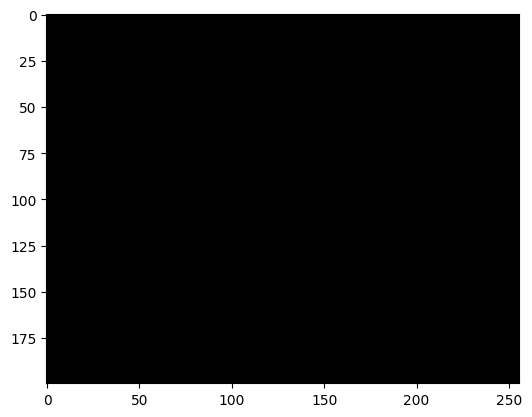

In [13]:
plt.imshow(obs)

In [14]:
obs

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [12]:
class StreetFighter(Env):
    def __init__(self):
        super().__inti__()
        self.observation_space = Box(low=0, high=255, shape=(200,256,3), dtype=np.uint8)
        self.action_space = MultiBinary(12)
        self.game = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis', use_restricted_actions = retro.Actions.FILTERED)
        
    
    def reset(self):
        obs = self.game.reset()
        self.previous_frame = obs
        self.score = 0
        return obs
    def preprocess(self, observation):
        gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray,(84,84,1), interpolation = cv2.INTER_CUBIC)
        pass    
    def step(self):
        pass
    def render(self):
        pass

    def close(self):
        pass